# Week-7

Decision trees and KNN

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [2]:
### Solution ###

Proportion of class-1 in parent node: 0.2
Entropy of parent node: 0.7219


### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

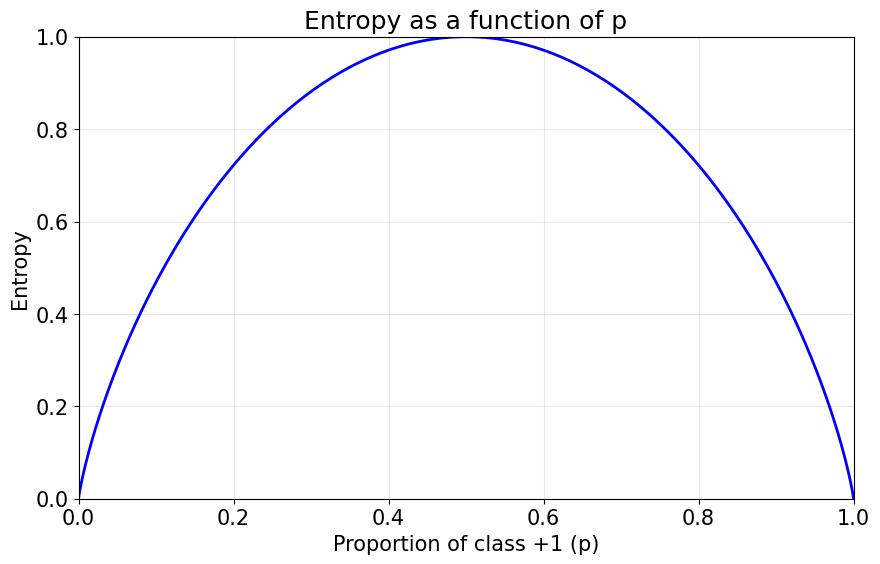

Maximum entropy occurs at p = 0.5 with value: 1.0000
Minimum entropy occurs at p = 0 or p = 1 with value: 0.0000


In [3]:
### Solution ###

### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [4]:
### Solution ###

Parent entropy: 0.7219
Left child entropy: 1.0000
Right child entropy: 0.6500
Gamma (proportion in left): 0.1000
Information Gain: 0.0369


### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [5]:
### Solution ###

Total points: 1000
Total positive class points: 400
Points in left node: 700
Points in right node: 300

Constraints analysis:
From q >= 0: q >= 0
From q <= 1: q <= 1
From n_pos_right >= 0: q <= 400/700 = 0.5714
From n_pos_right <= 300: q >= (400 - 300)/700 = 0.1429

Therefore:
q_min = 0.1429
q_max = 0.5714


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

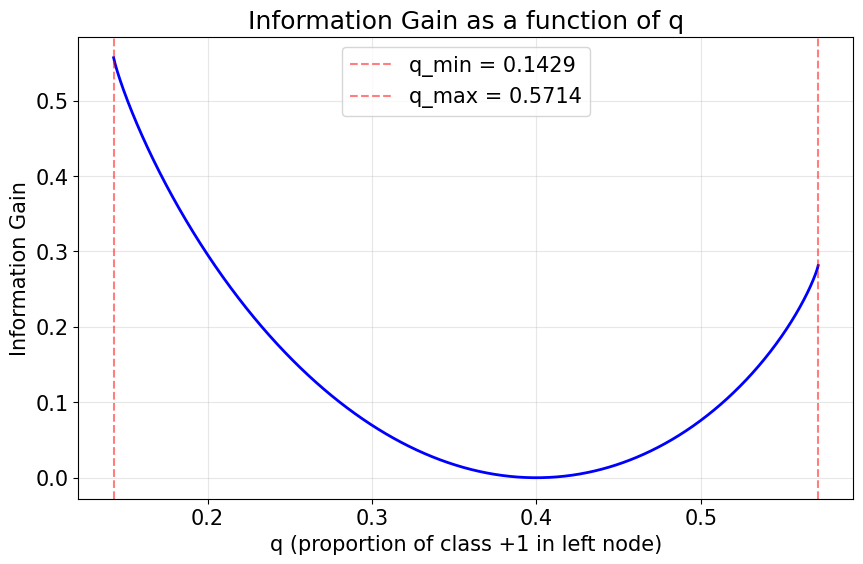

Range of q: [0.1429, 0.5714]
Maximum Information Gain: 0.5568
Optimal q value: 0.1429
Information Gain at boundaries:
  At q_min = 0.1429: IG = 0.5568
  At q_max = 0.5714: IG = 0.2813

Two interesting observations:
1. Information gain is maximum at extreme values (boundaries) rather than in the middle
2. The information gain decreases as q moves away from the boundaries toward the center


In [6]:
### Solution ###

### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [7]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

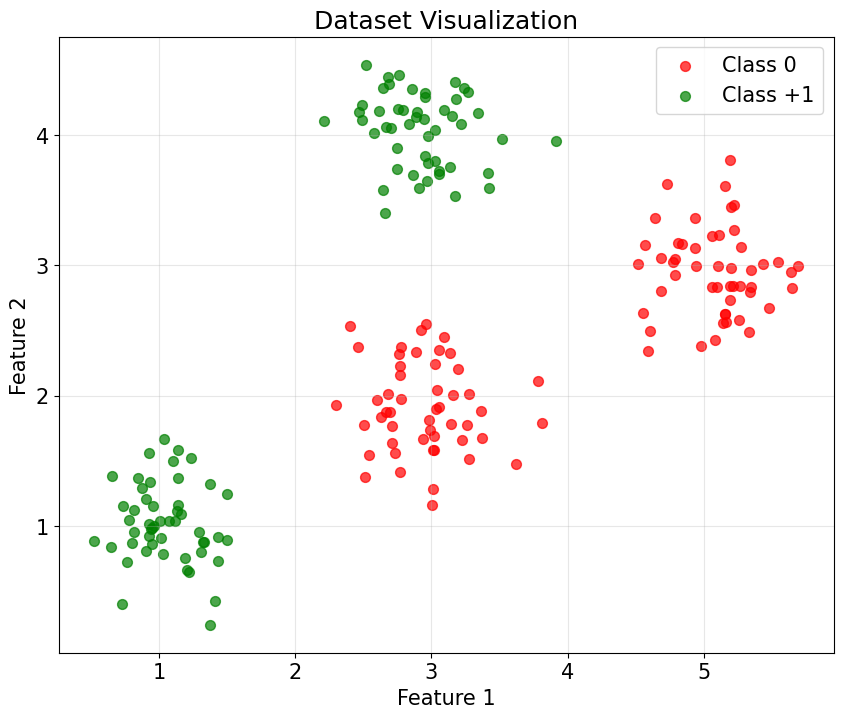

Dataset shape: (200, 2)
Number of class 0 samples: 100
Number of class 1 samples: 100
Feature ranges:
  Feature 1: [0.52, 5.70]
  Feature 2: [0.24, 4.54]


In [8]:
### Solution ###

### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [9]:
### Solution ###

Best question: f_0 < 2.2535
Feature index k: 0
Threshold θ: 2.2535
Information Gain: 0.3193

Split verification:
Left child: 51 samples, 51 positive
Right child: 149 samples, 49 positive
Left child proportion of class +1: 1.0000
Right child proportion of class +1: 0.3289


### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [10]:
### Solution ###

Decision Tree Structure:
Internal nodes: 3
Leaf nodes: 4
Total nodes: 7

Tree structure:
Root: f_0 < 2.2535
  L--- Predict class 1
  R--- f_1 < 3.3814
    L--- Predict class 0
    R--- f_0 < 4.3223
      L--- Predict class 1
      R--- Predict class 0


### Problem-9

Predict the label of the point $(3, 4)$.

In [11]:
### Solution ###

Prediction for point (3, 4): Class 1

Decision path for point (3, 4):
f_0 = 3.0000 < 2.2535? False
→ Go RIGHT
  f_1 = 4.0000 < 3.3814? False
  → Go RIGHT
    f_0 = 3.0000 < 4.3223? True
    → Go LEFT
      → Predict class 1


Prediction for point (3, 4): Class 1

Decision path for point (3, 4):
f_0 = 3.0000 < 2.2535? False
→ Go RIGHT
  f_1 = 4.0000 < 3.3814? False
  → Go RIGHT
    f_0 = 3.0000 < 4.3223? True
    → Go LEFT
      → Predict class 1


1

### Problem-10

Plot the decision boundary.

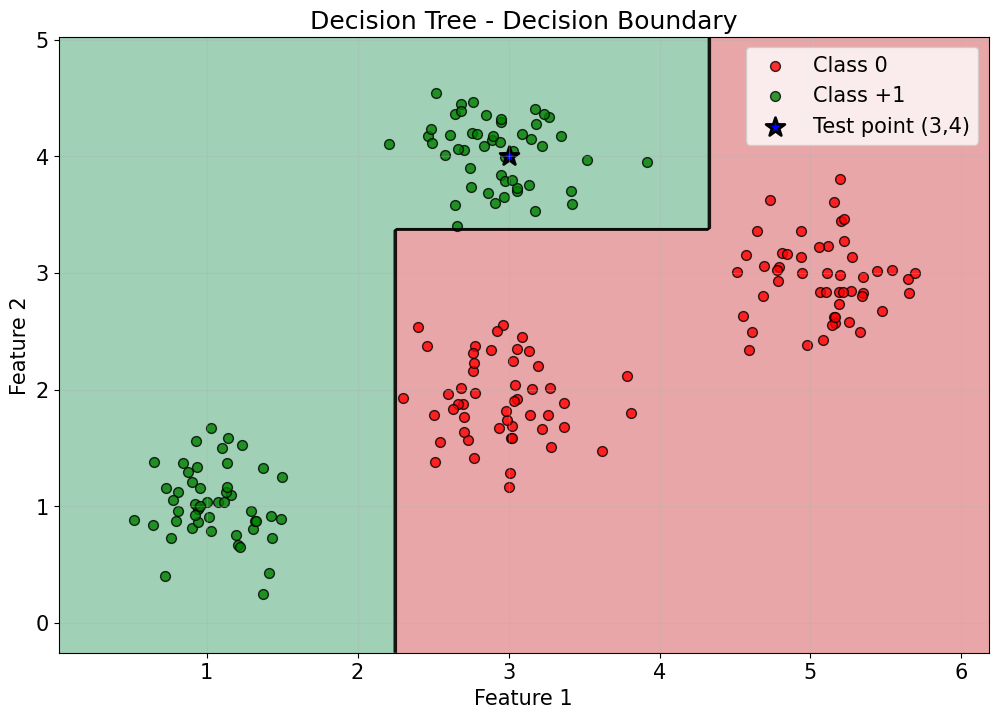

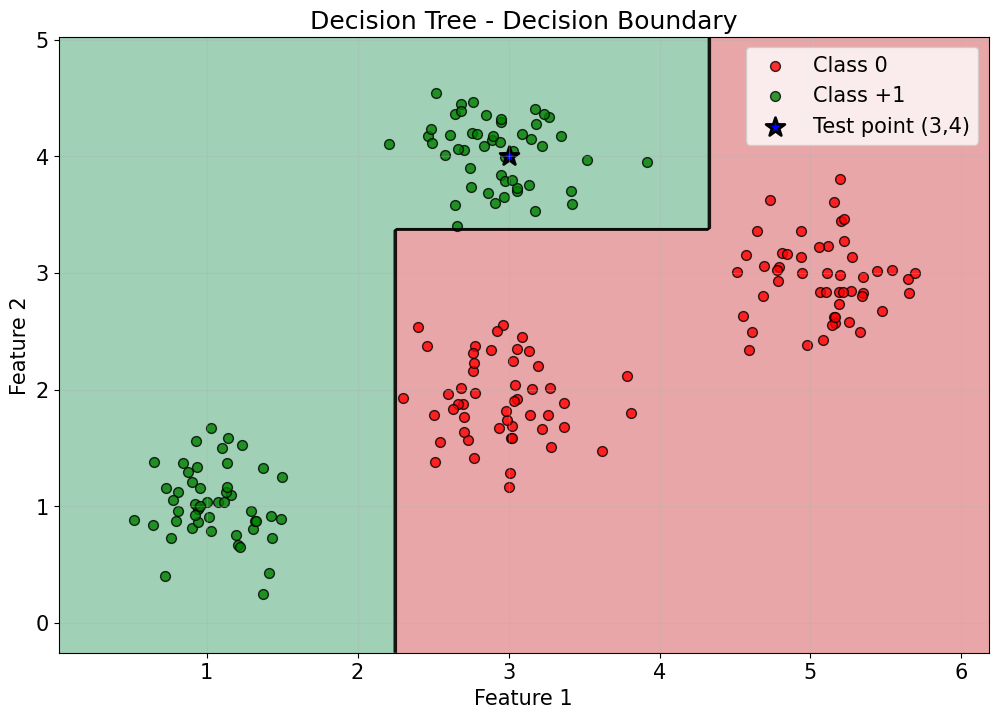

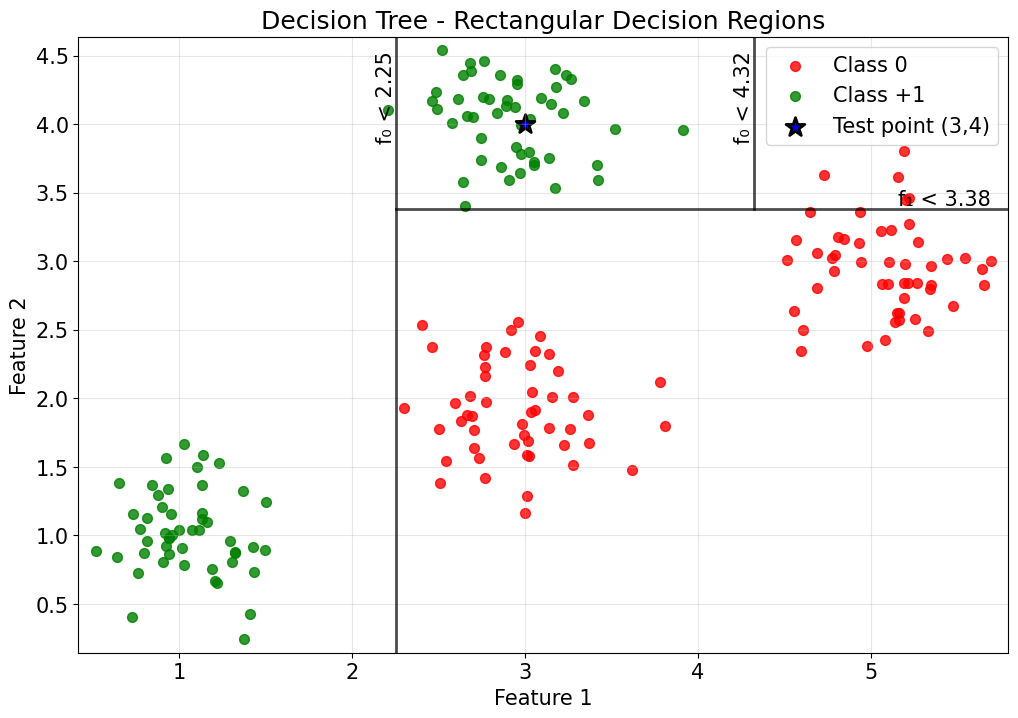

In [12]:
### Solution ###

## KNN


In [13]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

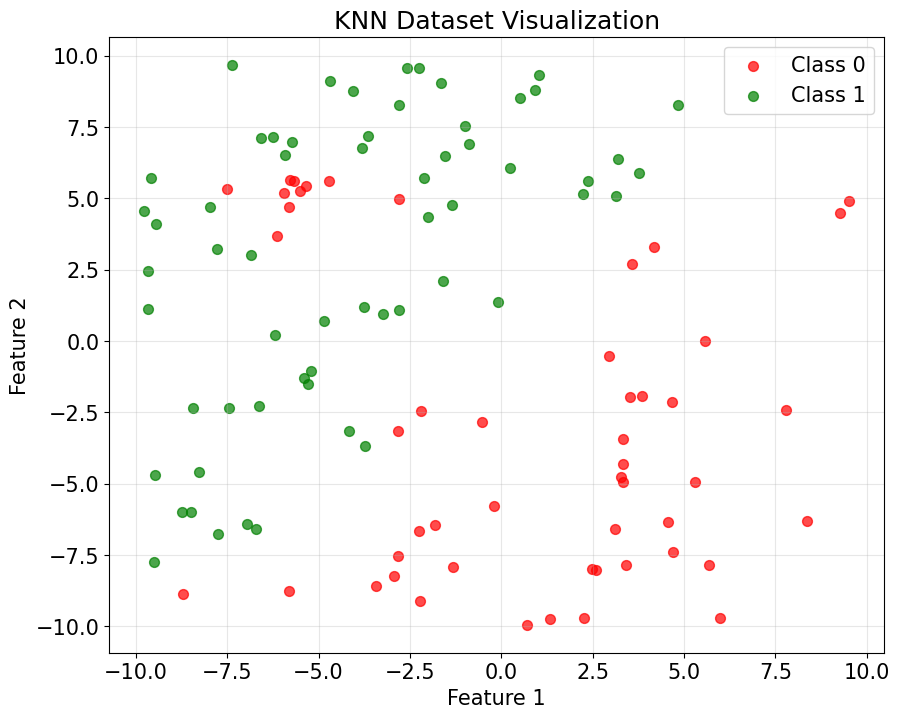

Dataset shape: (110, 2)
Number of class 0 samples: 50
Number of class 1 samples: 60
Feature ranges:
  Feature 1: [-9.76, 9.51]
  Feature 2: [-9.94, 9.68]


In [14]:
### Solution ###

### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

Prediction for point (-3, -2) with k = 10: Class 1

K = 10 nearest neighbors:
  1. Point (-2.21, -2.45), Distance: 0.91, Label: 0
  2. Point (-2.82, -3.14), Distance: 1.16, Label: 0
  3. Point (-4.17, -3.15), Distance: 1.64, Label: 1
  4. Point (-3.72, -3.66), Distance: 1.81, Label: 1
  5. Point (-5.29, -1.49), Distance: 2.35, Label: 1
  6. Point (-5.21, -1.04), Distance: 2.41, Label: 1
  7. Point (-5.39, -1.29), Distance: 2.49, Label: 1
  8. Point (-0.51, -2.85), Distance: 2.63, Label: 0
  9. Point (-3.24, 0.95), Distance: 2.96, Label: 1
  10. Point (-2.80, 1.09), Distance: 3.09, Label: 1

Class distribution among 10 nearest neighbors:
  Class 0: 3 neighbors
  Class 1: 7 neighbors
  Majority class: 1


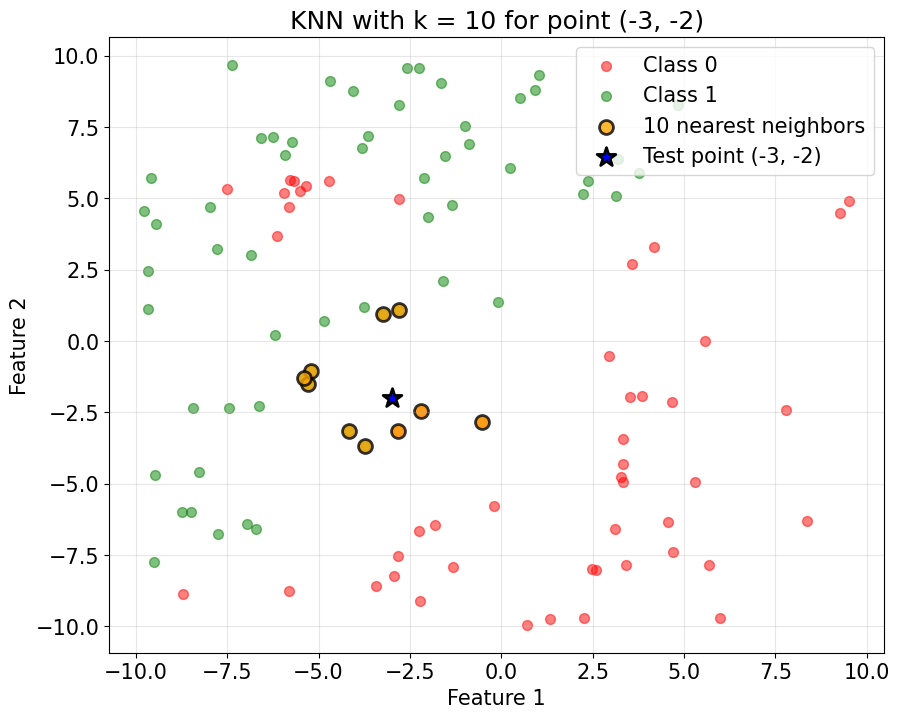

In [15]:
### Solution ###

### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

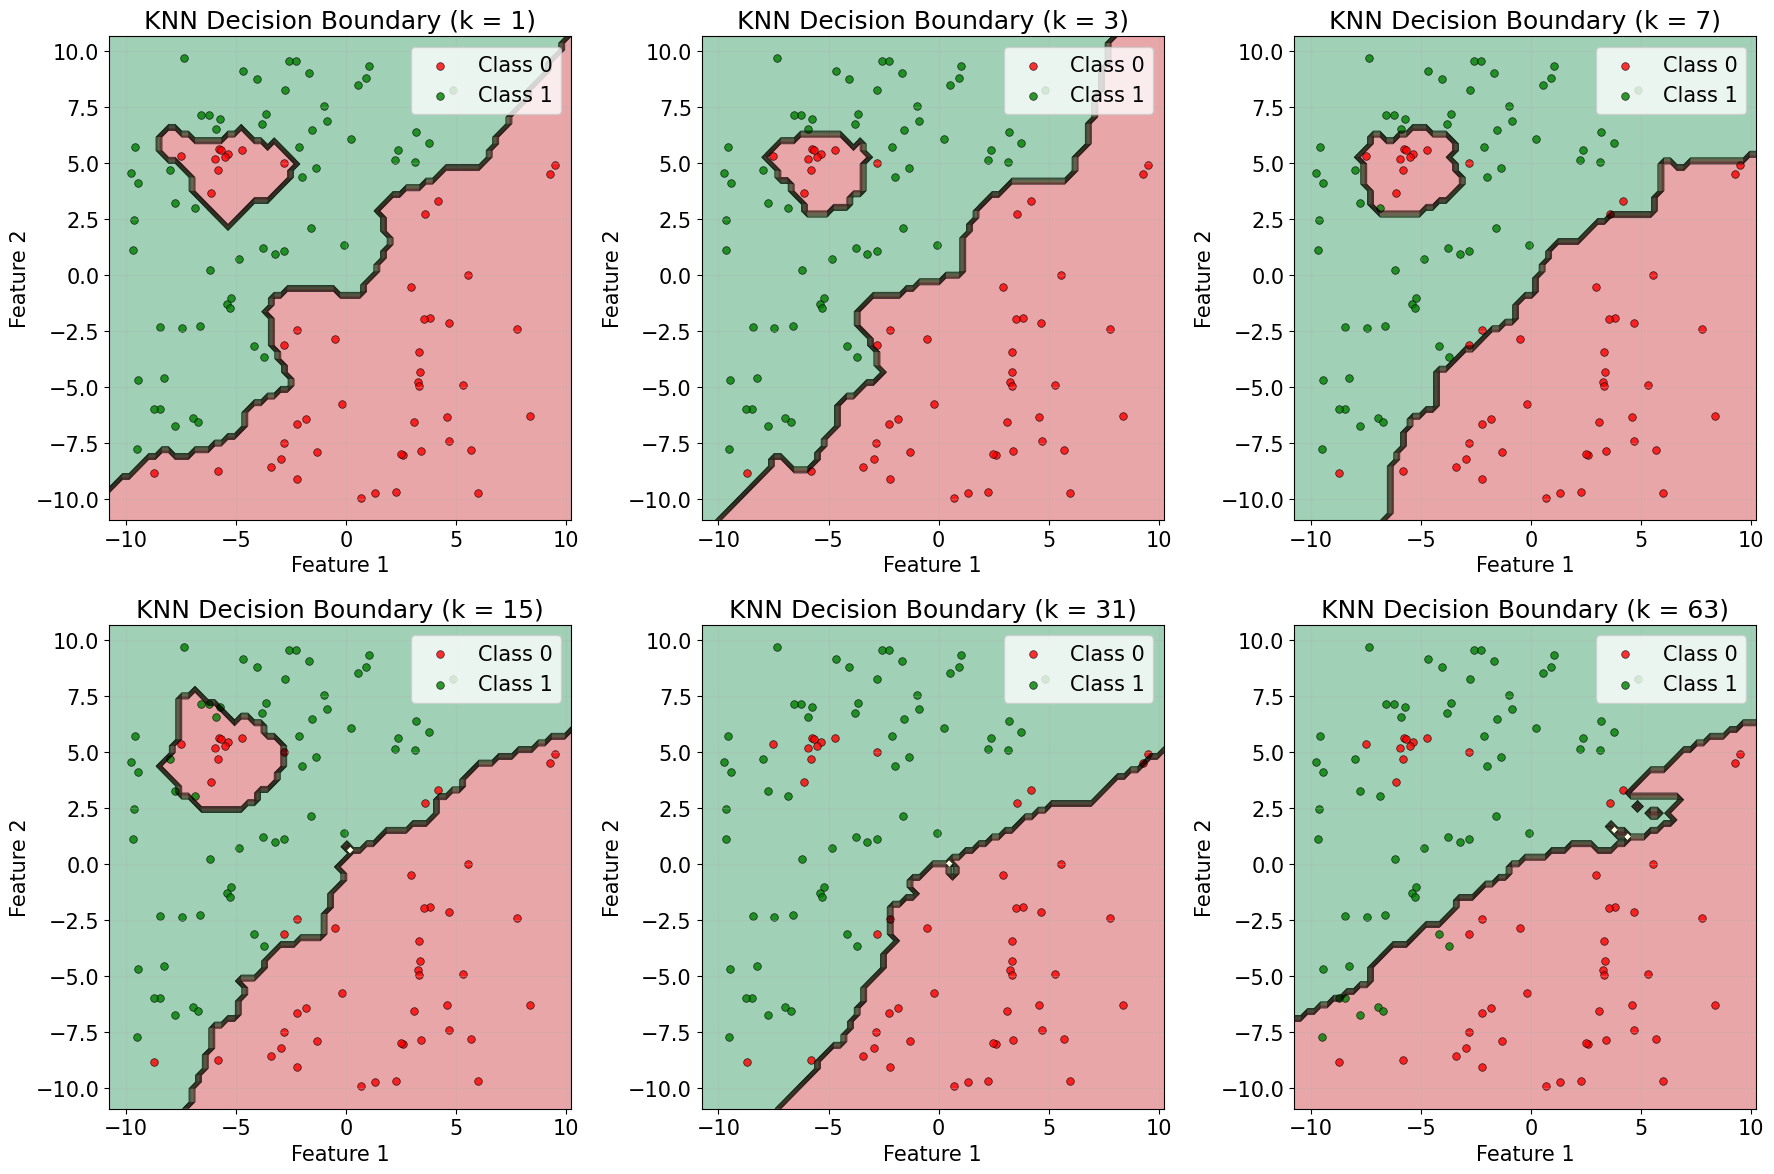

Two interesting observations:
1. As k increases, the decision boundary becomes smoother and less complex.
   - k=1 gives a very jagged, complex boundary that closely follows individual points
   - Higher k values (31, 63) give much smoother, more generalized boundaries

2. There's a trade-off between bias and variance:
   - Low k (k=1) has low bias but high variance (overfitting to training data)
   - High k has higher bias but lower variance (more generalized, may underfit)
   - Intermediate values (k=7, k=15) often provide a good balance


In [16]:
### Solution ###